<div style="text-align: right"> 13.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 8

## Rollen: Schiefe Ebene 

Wir betrachten einen Zylinder mit Radius $R$, Masse $m$ und Kreismittelpunkt $M$. Wir wollen die Bewegung des Zylinders entlang einer schiefen Ebene berechnen und visualisieren. Die schiefe Ebene hat einen Neigungswinkel $\theta = 12^{\circ}$. Der Startpunkt des Zylinders befinde sich $h_0=1$ über dem Boden.


<img src="./rollingPlane.png" alt="rollingPlane" width="300"/>

Die Höhe $h$ nach der auf der Ebene zurückgelegten Strecke $l$ beträgt
$$
h = h_0 - l \sin \theta
$$

und somit gilt für die potentielle Energie:
$$
E_{\mathrm{pot}} = m g (h_0 - l \sin \theta).
$$

Die kinetische Energie setzt sich zusammen aus der Translationsenergie $E_\mathrm{trans}=\frac{1}{2}mv^2 = \frac{1}{2}m\omega^2 R^2$ und der Rotationsenergie um die Hauptrotationsachse $E_\mathrm{rot}=\frac{1}{2}I\omega^2$, wobei $I$ das Trägheitsmoment des Zylinders bezüglich seiner Hauptrotationsachse ist
$$
E_\mathrm{kin}= E_\mathrm{trans} + E_\mathrm{rot} = \frac{1}{2}\left(I+mR^2\right)\omega^2.
$$

Die potentielle Energie wird beim Rollen in kinetische Energie umgesetzt. Es gilt also nach zurückgelegter Strecke $l$
$$
 m g l \sin \theta = \frac{1}{2}\left(I+mR^2\right)\omega^2.
 $$
 
**a)** Nehmen Sie an, es handle sich um einen Vollzylinder mit der Masse $m=1$ und einem Radius $R=0.1$.
Plotten Sie die Geschwindigkeit $v$ des Mittelpunktes $M$ in Abhängigkeit von der zurückgelegten Strecke $l$.

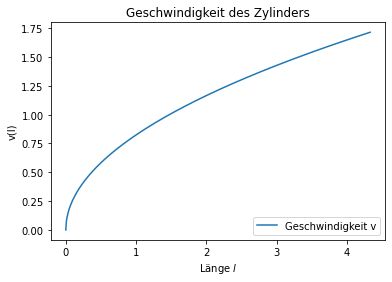

In [2]:
#import crucial python modules
import numpy as np
import matplotlib.pyplot as plt


#declare variables
m = 1 #mass
R = 0.1 #radius of cylinder
theta = 12 * np.pi/180 #angle in radians
g = 9.81 #in case of changing the location to another planet
h_0 = 1 #starting height


#define function for calculating velocity v based on traveled length l
def calc_v(l, theta):
    global g
    return (g*l*np.sin(theta)/3)**0.5

#create array with lengths l
l = np.linspace(0, (h_0-R)/np.sin(theta), 500)
#calculate array of velocities with input ls
v = calc_v(l, theta)



#usual MatPlotLib stuff
fig, ax = plt.subplots()


#plot solutions
ax.set_title("Geschwindigkeit des Zylinders")  # Titel
ax.plot(l, v, label='Geschwindigkeit v')
ax.set_xlabel("Länge $l$")
ax.set_ylabel("v(l)")

plt.legend(loc=4)
plt.show()

**b)** Plotten Sie die $y$-Komponente des Punktes $A$ gegen die Zeit $t$ im mit dem Mittelpunkt M translatierenden Koordinatensystem. Plotten Sie ebenfalls die Bahnkurve (also $x(t)$ gegen $y(t)$) des Mittelpunkts $M$ und die Bahnkurve des Punktes $A$ im ruhenden Bezugssystem. Hinweis: Die Situation hier ähnelt Übungsblattaufgabe Nr. 2.5.

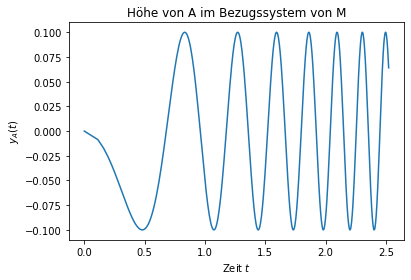

In [3]:
# Hilfe zur Berechnung von t:
t = np.zeros_like(v) # hier ist v die vorher berechnete Geschwindigkeit v
t[1:] = l[1:] / v[1:] # Berechnung der Zeit; l ist die zurückgelegte Distanz wie in der Aufgabenstellung beschrieben

# Diese Art auf arrays zuzugreifen nennt man *slicing*. 

# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
M_x = np.cos(theta)*l
M_y = h_0 - np.sin(theta)*l 


# Berechne die Koordinaten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem abhängig von R, omega und t
w = np.sqrt( g * l * np.sin(theta)/(3 * R**2) )

A_x = R*np.cos(-w*t)
A_y = R*np.sin(-w*t)

# Berechne aus den Koordinaten x und y und aus den Koordianten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem
# die Koordinaten des Punkts A im ruhenden Bezugssystem (Tipp: Addition)
x = M_x + A_x
y = M_y + A_y


# Plotte y-Koordinate des Punkts A im mit dem Punkt M tanslatierenden Koordinatensystem 
#usual MatPlotLib stuff
fig, ax = plt.subplots()


#plot solutions
ax.set_title("Höhe von A im Bezugssystem von M")  # Titel
ax.plot(t, A_y, label='')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("$y_A(t)$")

#plt.legend(loc=4)
plt.show()



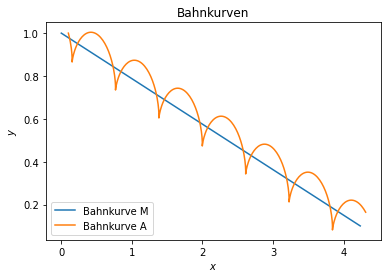

In [4]:
# Plotte Trajektorie von Mittelpunkt M und Punkt A
#usual MatPlotLib stuff
fig, ax = plt.subplots()


#plot solutions
ax.set_title("Bahnkurven")  # Titel
ax.plot(M_x, M_y, label='Bahnkurve M')
ax.plot(x,y, label='Bahnkurve A')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

plt.legend(loc=3)
plt.show()